Si fuéramos el encargado de llevar el inventario y quisierámos ajustar la política de pedido (s, S). 

In [1780]:
import numpy as np
from inventory.inventory_simulation import InventoryConfig, inventory_simulation

price_product = 100
# demora refill_interval_product unidades de tiempo en llegar el pedido (L) 
refill_interval_product = 3
# cuesta 2/3 del precio al que se vende comprarlo
refill_cost_product = lambda product_cant: product_cant * price_product / 2
# cuesta 1 por producto por unidad de tiempo mantenerlo
inventory_cost_product = lambda product_cant, y: product_cant * y / 100

s_product1 = 25
S_product1 = 80

s_product2 = 25
S_product2 = 110

config1 = InventoryConfig(price_product, s_product1, S_product1, refill_interval_product,
                                  refill_cost_product, inventory_cost_product)
config2 = InventoryConfig(price_product, s_product2, S_product2, refill_interval_product,
                                  refill_cost_product, inventory_cost_product)

demand_dist_product = lambda: np.random.randint(1, 5)
demand_dists = [demand_dist_product]

max_time = 24 * 7 

time_dist = lambda: np.random.exponential(8)

initial_money = 0

total_simulations = 100
simulation1_results = []
simulation2_results = []

for i in range(total_simulations):
    _, state = inventory_simulation(max_time, time_dist, [config1], demand_dists, [S_product1], initial_money)
    simulation1_results.append(state.money)

    _, state = inventory_simulation(max_time, time_dist, [config2], demand_dists, [S_product2], initial_money)
    simulation2_results.append(state.money)
    
average1 = np.mean(simulation1_results)
average2 = np.mean(simulation2_results)	

print(f"Average money in simulation 1: {average1} with s={s_product1} and S={S_product1}")
print(f"Average money in simulation 2: {average2} with s={s_product2} and S={S_product2}")

Average money in simulation 1: 3592.765009831206 with s=25 and S=80
Average money in simulation 2: 4900.397276341767 with s=25 and S=110


In [1792]:
#calculemos la varianza
variance1 = np.std(simulation1_results)
variance2 = np.std(simulation2_results)

print(f"Sd in simulation 1: {variance1} with s={s_product1} and S={S_product1}")
print(f"Sd in simulation 2: {variance2} with s={s_product2} and S={S_product2}")

Sd in simulation 1: 1472.0671903140264 with s=25 and S=80
Sd in simulation 2: 1102.3620793939826 with s=25 and S=110


/tmp/ipykernel_8391/3354690900.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([(f's={s_product1} and S={S_product1}'), f's={s_product2} and S={S_product2}'])


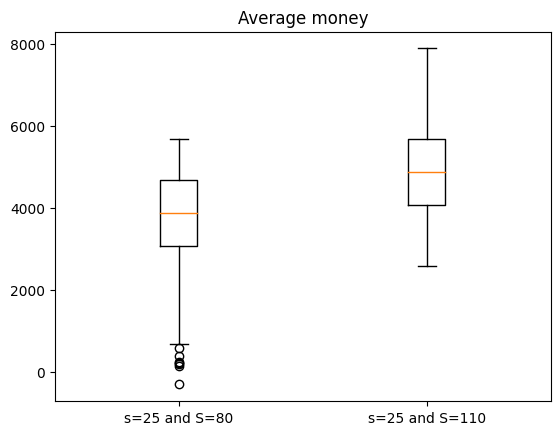

In [1782]:
# analicemos el promedio de dinero 
import matplotlib.pyplot as plt

data = [simulation1_results, simulation2_results]

# cambiar la escala para visualizar mejor los resultados



fig, ax = plt.subplots(dpi=100)
ax.set_xticklabels([(f's={s_product1} and S={S_product1}'), f's={s_product2} and S={S_product2}'])
ax.set_title('Average money')

ax.boxplot(data)
plt.savefig('average_cost')
plt.show()

In [1783]:
# ahora analicemos los intervalos de confianza
import scipy.stats as stats

confidence = 0.95
n = len(simulation1_results)
m = len(simulation2_results)

mean1 = np.mean(simulation1_results)
mean2 = np.mean(simulation2_results)

std1 = np.std(simulation1_results)
std2 = np.std(simulation2_results)

ci1 = stats.norm.interval(confidence, loc=mean1, scale=std1/np.sqrt(n))
ci2 = stats.norm.interval(confidence, loc=mean2, scale=std2/np.sqrt(m))

print(f"Confidence interval for simulation 1: {ci1}")
print(f"Confidence interval for simulation 2: {ci2}")

# intervalo de confianza para las diferencia
diff_mean = mean1 - mean2
data = [m - n for m,n in zip(simulation1_results, simulation2_results)]
mean = np.mean(data)
std = np.std(data)
alpha = 1 - confidence
tstat = stats.t.ppf(1-alpha/2, len(data) - 1)

error_margin = tstat * std / np.sqrt(len(data))
lbound = mean - error_margin
ubound = mean + error_margin

print(f"Confidence interval for the difference: ({lbound},{ubound})")


Confidence interval for simulation 1: (3304.24514224735, 3881.284877415062)
Confidence interval for simulation 2: (4684.338278988278, 5116.456273695256)
Confidence interval for the difference: (-1647.6991746905496,-967.5653583305733)
